<a href="https://colab.research.google.com/github/arunmadhuk/Machine-Learning/blob/master/Yoga_Pose_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle data access from Colab

In [2]:
pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arunmadhuk","key":"2476021d860cbc508c106a07e5520abd"}'}

In [4]:
mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/

In [5]:
ls /root/.kaggle

In [11]:
ls -l ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 66 Jun 15 08:58 /root/.kaggle/kaggle.json


In [13]:
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        182           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        312           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        922           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5811           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      47456           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      12282           False  
connectx

In [16]:
!kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset

 99% 993M/0.98G [00:10<00:00, 92.3MB/s]
100% 0.98G/0.98G [00:10<00:00, 101MB/s]


In [17]:
ls

kaggle.json  sample_data/  yoga-pose-image-classification-dataset.zip


In [18]:
!mkdir yoga-pose
!unzip yoga-pose-image-classification-dataset.zip -d yoga-pose

Streaming output truncated to the last 5000 lines.
  inflating: yoga-pose/dataset/bharadvajasana i/11-1.png  
  inflating: yoga-pose/dataset/bharadvajasana i/14-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/15-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/18-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/18-1.png  
  inflating: yoga-pose/dataset/bharadvajasana i/19-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/2-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/20-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/21-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/22-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/23-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/24-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/26-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/28-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/29-0.png  
  inflating: yoga-pose/dataset/bharadvajasana i/3-0.png  
  infla

In [19]:
ls

kaggle.json   yoga-pose/
sample_data/  yoga-pose-image-classification-dataset.zip


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [36]:
import pathlib
image_path = 'yoga-pose/dataset'
tf_dataimageset = tf.keras.preprocessing.image_dataset_from_directory(image_path,
                                                                   labels ="inferred",
                                                                   label_mode="int",
                                                                   class_names=None,
                                                                   color_mode="rgb",
                                                                   batch_size=32,
                                                                   )

Found 5993 files belonging to 107 classes.


In [38]:
tf_dataimageset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(image_path,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 5993 files belonging to 107 classes.
Using 4795 files for training.


In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(image_path,
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 5993 files belonging to 107 classes.
Using 1198 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['adho mukha svanasana', 'adho mukha vriksasana', 'agnistambhasana', 'ananda balasana', 'anantasana', 'anjaneyasana', 'ardha bhekasana', 'ardha chandrasana', 'ardha matsyendrasana', 'ardha pincha mayurasana', 'ardha uttanasana', 'ashtanga namaskara', 'astavakrasana', 'baddha konasana', 'bakasana', 'balasana', 'bhairavasana', 'bharadvajasana i', 'bhekasana', 'bhujangasana', 'bhujapidasana', 'bitilasana', 'camatkarasana', 'chakravakasana', 'chaturanga dandasana', 'dandasana', 'dhanurasana', 'durvasasana', 'dwi pada viparita dandasana', 'eka pada koundinyanasana i', 'eka pada koundinyanasana ii', 'eka pada rajakapotasana', 'eka pada rajakapotasana ii', 'ganda bherundasana', 'garbha pindasana', 'garudasana', 'gomukhasana', 'halasana', 'hanumanasana', 'janu sirsasana', 'kapotasana', 'krounchasana', 'kurmasana', 'lolasana', 'makara adho mukha svanasana', 'makarasana', 'malasana', 'marichyasana i', 'marichyasana iii', 'marjaryasana', 'matsyasana', 'mayurasana', 'natarajasana', 'padangusthasan

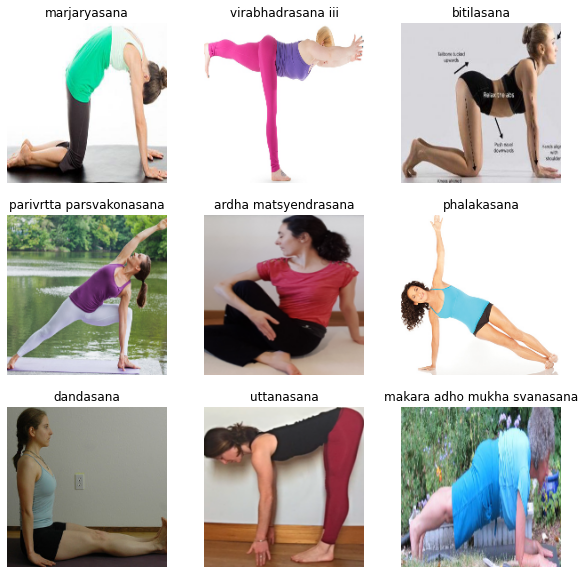

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
